<a href="https://colab.research.google.com/github/widm2240/temp221014/blob/main/code20221014.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##라이브러리 불러오기

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

print(matplotlib.__version__)
print(sns.__version__)

3.2.2
0.11.2


## 객체지향으로 시각화 그래프 그리기
- Maplotlib + Seaborn

In [9]:
# 데이터 불러오기
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


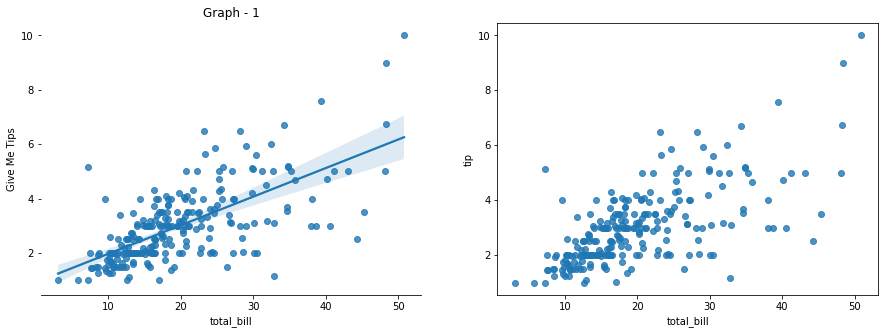

In [29]:
#객체 선언
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 5))

sns.regplot(x = 'total_bill', y = 'tip', data = tips, ax = ax[0])
sns.regplot(x = 'total_bill', y = 'tip', data = tips, ax = ax[1], fit_reg = False)

# 객체지향의 위대함
ax[0].set_title("Graph - 1")
ax[0].set_ylabel("Give Me Tips")
ax[0].spines["top"].set_visible(False)
ax[0].spines["right"].set_visible(False)
ax[0].spines["left"].set_visible(False)

plt.show()

plotly
- matplotlib.seaborn과 유사한 클래스
- Low-Level API, High-Level API

In [17]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FuncFormatter)
import seaborn as sns
import numpy as np

In [18]:
def plot_example(ax, zorder=0):
    ax.bar(tips_day["day"], tips_day["tip"], color="lightgray", zorder=zorder)
    ax.set_title("tip (mean)", fontsize=16, pad=12)

    # Values
    h_pad = 0.1
    for i in range(4):
        fontweight = "normal"
        color = "k"
        if i == 3:
            fontweight = "bold"
            color = "darkred"

        ax.text(i, tips_day["tip"].loc[i] + h_pad, f"{tips_day['tip'].loc[i]:0.2f}", 
                horizontalalignment='center', fontsize=12, fontweight=fontweight, color=color)

    # Sunday
    ax.patches[3].set_facecolor("darkred")
    ax.patches[3].set_edgecolor("black")

    # set_range
    ax.set_ylim(0, 4)
    return ax

def major_formatter(x, pos):
    return "{%.2f}" % x
formatter = FuncFormatter(major_formatter)

In [21]:
tips_day = tips.groupby("day").mean().reset_index()
tips_day

,day,total_bill,tip,size
0,Thur,17.682742,2.771452,2.451613
1,Fri,17.151579,2.734737,2.105263
2,Sat,20.441379,2.993103,2.517241
3,Sun,21.410000,3.255132,2.842105


OrderedDict([('left', <matplotlib.spines.Spine object at 0x7fc26453e590>), ('right', <matplotlib.spines.Spine object at 0x7fc264af59d0>), ('bottom', <matplotlib.spines.Spine object at 0x7fc2645a1190>), ('top', <matplotlib.spines.Spine object at 0x7fc264df5fd0>)])
<class 'matplotlib.axis.YAxis'>


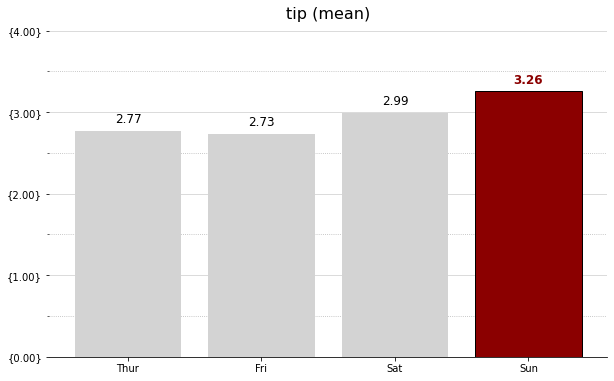

In [53]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = plot_example(ax, zorder = 2)

print(ax.spines)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

print(type(ax.yaxis))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_minor_locator(MultipleLocator(0.5))

#grid
ax.grid(axis="y", which="major", color="lightgray")
ax.grid(axis="y", which="minor", ls=":")

https://matplotlib.org/3.2.2/api/spines_api.html?highlight=spines#module-matplotlib.spines